## Algoritmos e Programação Estruturada

APE-U3S2

## Escopo e passagem de parâmetros

### Variável local

In [3]:
#include<stdio.h>

void teste() {
    int x = 10;

    printf("\n Valor de x na funcao test() = %d", x);
}

int main() {
    int x = 20;

    teste();  //"procedimento" (não retorna valor)
    printf("\n Valor de x na funcao main() = %d", x);
}


 Valor de x na funcao test() = 10
 Valor de x na funcao main() = 20

### Variável global

In [5]:
#include<stdio.h>

int x = 10;

void teste() {

    x = 20;
    printf("%d, ", x);
}

int main() {
    printf("%d, ", x);
    teste();
    x = 30;
    printf("%d, ", x);
}

10, 20, 30, 

- Global permanece na memória ocupando espaço durante todo o tempo de execução.
    - A local libera o espaço no final da função.
- Dificulta modularização e reuso.
- Uma mudança na variável acaba se propagando para o programa todo, o programa pode funcionar assim mesmo e o bug fica difícil de encontrar.
- Fica difícil de testar módulos separadamente, ou isolar um trecho para testar.
    - Se mudar a variável apenas naquele trecho, afeta o programa inteiro.
- Se quiser alterar a variável em um programa de 1000 linhas precisa percorrer todos os arquivos e toda estrutura de diretórios.
- Pode levar a problemas de colisão ao unir vários módulos e bibliotecas.
- Uma aplicação seria usar para definir constantes que não mudam no programa todo.
- Se existir uma global e uma local com o mesmo nome fica difícil identificar.

## Exemplo do uso de variáveis globais

In [13]:
#include<stdio.h>

float t1, t2;

float calcularMedia() {
    return (t1 + t2) / 2;
}

int main() {
    printf("\n Digite as duas temperaturas: ");
    scanf("%f %f", & t1, & t2);
    printf("\n A temperatura media = %.2f", calcularMedia());
}


 Digite as duas temperaturas: 

 10 20



 A temperatura media = 15.00

In [11]:
#include<stdio.h>

int x = 10;

int main() {
    int x = -1;
    int b;

    {
        extern int x;
        b = x;
    }

    printf("\n Valor de x = %d", x);
    printf("\n Valor de b (x global) = %d", b);
}


 Valor de x = -1
 Valor de b (x global) = 10

- Os colchetes definem um novo escopo, assim a variável x não colide.

## Passagem de parâmetros para funções

- Passagem por valor
    - O valor da variável é copiado
        - As variáveis originais não são alteradas
    - Variáveis locais são criadas, contendo o valor
    - Quando termina a função, as variáveis locais são liberadas
- Passagem por referência
    - O endereço da variável (ponteiro) é copiado

In [10]:
#include<stdio.h>

int somar(int a, int b) {
    return a + b;
}

int main() {
    int result;

    result = somar(10, 15);
    printf("\n Resultado da soma = %d", result);
}


 Resultado da soma = 25

In [14]:
#include<stdio.h>

void testar(int n1, int n2) {
    n1 = -1;
    n2 = -2;
    printf("\n\n Valores dentro da funcao testar(): ");
    printf("\n n1 = %d e n2 = %d", n1, n2);
}

int main() {
    int n1 = 10;
    int n2 = 20;

    printf("\n\n Valores antes de chamar a funcao: ");
    printf("\n n1 = %d e n2 = %d", n1, n2);

    testar(n1, n2);  // "procedimento" (a função não retorna valor)

    printf("\n\n Valores depois de chamar a funcao: ");
    printf("\n n1 = %d e n2 = %d", n1, n2);
    return 0;
}



 Valores antes de chamar a funcao: 
 n1 = 10 e n2 = 20

 Valores dentro da funcao testar(): 
 n1 = -1 e n2 = -2

 Valores depois de chamar a funcao: 
 n1 = 10 e n2 = 20

## Passagem por referência

- Ao invés do valor da variável, é passado o endereço de memória (ponteiro) da variável
- Cuidado:
    - A variável não é copiada
    - Não é criada uma nova variável
    - A variável não se torna local
    - Se alterar acaba alterando a variável original da função que chamou

### Ponteiros

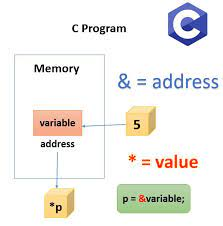

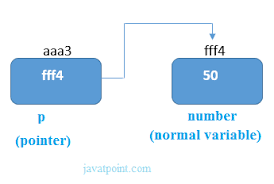

- Operação com ponteiros:
    - "*" pode significar 2 coisas:
        - Declarar a variável como tipo ponteiro ("declaração")
        - Acessar o conteúdo da variável apontada pelo ponteiro ("valor")
    - "&" significa "retorna o endereço de memória da variável" ("endereço")

In [16]:
#include<stdio.h>

void testar(int * n1, int * n2) {
    * n1 = -1;  // * = "conteúdo apontado por"
    * n2 = -2;
    printf("\n\n Valores dentro da funcao testar(): ");
    printf("\n n1 = %d e n2 = %d", * n1, * n2);
}

int main() {
    int n1 = 10;
    int n2 = 20;
    printf("\n\n Valores antes de chamar a funcao: ");
    printf("\n n1 = %d e n2 = %d", n1, n2);

    testar( & n1, & n2);

    printf("\n\n Valores depois de chamar a funcao: ");
    printf("\n n1 = %d e n2 = %d", n1, n2);
}



 Valores antes de chamar a funcao: 
 n1 = 10 e n2 = 20

 Valores dentro da funcao testar(): 
 n1 = -1 e n2 = -2

 Valores depois de chamar a funcao: 
 n1 = -1 e n2 = -2

## Passagem de vetor

- É sempre feita implicitamente por referência
- Não é necessário usar "*" e "&"

In [18]:
#include<stdio.h>

void inserir(int a[]) {
    int i = 0;

    for (i = 0; i < 3; i++) {
        printf("Digite o valor %d: ", i);
        scanf("%d", & a[i]);
    }
}

void imprimir(int b[]) {
    int i = 0;

    for (i = 0; i < 3; i++) {
        printf("\n numeros[%d] = %d", i, 2 * b[i]);
    }
}

int main() {
    int numeros[3];

    printf("\n Preenchendo o vetor... \n ");

    inserir(numeros);

    printf("\n Dobro dos valores informados:");

    imprimir(numeros);
}


 Preenchendo o vetor... 
 Digite o valor 0: 

 10


Digite o valor 1: 

 20


Digite o valor 2: 

 30



 Dobro dos valores informados:
 numeros[0] = 20
 numeros[1] = 40
 numeros[2] = 60